# Churn Prediction for StreamWorks Media.

## Loading and Exploring the Data

In [535]:
# Importing necessary libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [536]:
# Importing and observing the data.
data = pd.read_csv('C:/Users/RAMIL/Downloads/streamworks_user_data.csv')
data.head()

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99


In [537]:
# Getting information about the columns of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB


In [538]:
# Getting statistical information about the columns of the data.
data.describe(include = 'all')

,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
count,1498.000000,1497.000000,1499,1498,1498,1497,1497,1496.000000,1498.000000,1497.000000,1497,1497,1499.000000,1355.000000
unique,NaN,NaN,3,819,1,6,3,NaN,NaN,NaN,2,2,NaN,NaN
top,NaN,NaN,Female,30-05-24,13-07-25,Canada,Basic,NaN,NaN,NaN,No,Yes,NaN,NaN
freq,NaN,NaN,510,6,1498,262,505,NaN,NaN,NaN,763,752,NaN,NaN
mean,1750.871829,43.738811,NaN,NaN,NaN,NaN,NaN,39.903342,51.414419,2.498330,NaN,NaN,0.234156,10.180406
std,433.060980,15.083920,NaN,NaN,NaN,NaN,NaN,22.978288,28.580117,1.706829,NaN,NaN,0.423612,3.310705
min,1001.000000,18.000000,NaN,NaN,NaN,NaN,NaN,0.500000,0.000000,0.000000,NaN,NaN,0.000000,5.990000
25%,1376.250000,31.000000,NaN,NaN,NaN,NaN,NaN,19.450000,27.100000,1.000000,NaN,NaN,0.000000,5.990000
50%,1750.500000,44.000000,NaN,NaN,NaN,NaN,NaN,40.300000,52.700000,2.000000,NaN,NaN,0.000000,9.990000
75%,2125.750000,56.000000,NaN,NaN,NaN,NaN,NaN,59.800000,76.200000,4.000000,NaN,NaN,0.000000,13.990000


In [539]:
data['country'].value_counts()

country
Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
Name: count, dtype: int64

In [540]:
data['gender'].value_counts()

gender
Female    510
Other     506
Male      483
Name: count, dtype: int64

In [541]:
data['is_churned'].value_counts()

is_churned
0.0    1148
1.0     351
Name: count, dtype: int64

_**For modeling the data is inbalanced.**_

In [543]:
data.isnull().sum()

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64

_**We have got some null values in the dataset especially in monthly_fee column.**_

<Axes: >

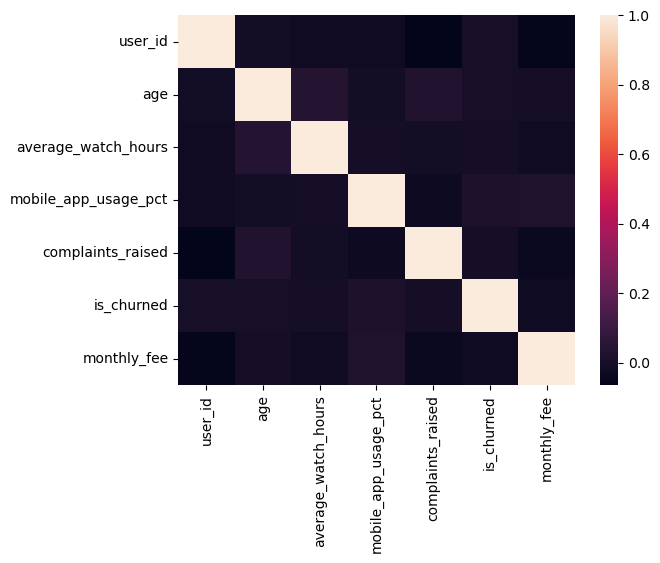

In [545]:
corr = data.corr(numeric_only = True)
sns.heatmap(corr)

_**There is a generally strong relationship between numerical columns.**_

## Cleaning and Preparing the Data

In [548]:
# Converting date columns into datetime data format.
data['signup_date'] = pd.to_datetime(data['signup_date'], errors = 'coerce')
data['last_active_date'] = pd.to_datetime(data['last_active_date'], errors = 'coerce')

In [549]:
# Creating a new feature called "tenure_days" which is the number of days since signup and last active date.
data['tenure_days'] = (data['last_active_date'] - data['signup_date']).dt.days

In [550]:
# Creating a new feature called 'is_loyal' to indicate if a customer was active at least 181 days since signup.
data['is_loyal'] = np.where(data['tenure_days'] > 180, True, False)

### Handling Missing Values

In [552]:
# Observing the missing values.
data.isnull().sum()

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
tenure_days               4
is_loyal                  0
dtype: int64

user_id (2 missing): Rows with missing user_id will be removed, as this field is a unique identifier and cannot be meaningfully imputed.

age (3 missing): Missing values will be imputed using the median age to reduce the impact of outliers.

signup_date (2 missing): Rows with missing signup_date will be removed, since temporal information is required for tenure-related analysis.

last_active_date (2 missing): Missing values will be imputed using the median inactivity duration derived from existing users.

subscription_type (3 missing): Missing values will be filled with "Unknown" to preserve records while distinguishing them from known subscription categories.

average_watch_hours (4 missing): Missing values will be imputed using the median, as watch time may be skewed.

mobile_app_usage_pct (2 missing): Missing values will be imputed using the mean, assuming a roughly symmetric distribution.

complaints_raised (1 missing): Missing value will be filled with 0, assuming no complaints were recorded.

monthly_fee (145 missing): Missing values will be imputed using the median monthly fee, conditional on subscription_type, to maintain pricing consistency.

tenure_days (4 missing): Missing values will be recalculated from signup_date where possible; otherwise, they will be imputed using the median tenure.

In [554]:
# 1. Droping rows with missing user_id
data = data.dropna(subset=['user_id'])

# 2. Imputing age with median
data['age'] = data['age'].fillna(data['age'].median())

# 3. Droping rows with missing signup_date
data = data.dropna(subset=['signup_date'])

# 4. Imputing last_active_date using median inactivity duration
median_inactive_days = (
    (data['last_active_date'] - data['signup_date'])
    .dt.days
    .median()
)

data.loc[data['last_active_date'].isna(), 'last_active_date'] = (
    data.loc[data['last_active_date'].isna(), 'signup_date'] +
    pd.to_timedelta(median_inactive_days, unit='D')
)

# 5. Filling missing subscription_type with 'Unknown'
data['subscription_type'] = data['subscription_type'].fillna('Unknown')

# 6. Imputing average_watch_hours with median
data['average_watch_hours'] = data['average_watch_hours'].fillna(
    data['average_watch_hours'].median()
)

# 7. Imputing mobile_app_usage_pct with mean
data['mobile_app_usage_pct'] = data['mobile_app_usage_pct'].fillna(
    data['mobile_app_usage_pct'].mean()
)

# 8. Filling missing complaints_raised with 0
data['complaints_raised'] = data['complaints_raised'].fillna(0)

# 9. Imputing monthly_fee with median per subscription_type
data['monthly_fee'] = data.groupby('subscription_type')['monthly_fee']\
    .transform(lambda x: x.fillna(x.median()))

# Fallback in case 'Unknown' still has NaN
data['monthly_fee'] = data['monthly_fee'].fillna(data['monthly_fee'].median())

# 10. Recalculating tenure_days from signup_date where missing
data['tenure_days'] = data['tenure_days'].fillna(
    (data['last_active_date'] - data['signup_date']).dt.days
)

# 11. Dropping rows with missing values in 'is_churned' column.
data = data.dropna(subset=['is_churned'])

# 12. Imputing null values in gender column.
data['gender'] = data['gender'].fillna('Unknown')

# 13. Imputing null values in country column.
data['country'] = data['country'].fillna('Unknown')

# 14. Imputing null values in received_promotion column.
data['received_promotions'] = data['received_promotions'].fillna('Unknown')

# 15. Imputing null values in referred_by_friend column.
most_common_value = data['referred_by_friend'].mode()[0]
data['referred_by_friend'] = data['referred_by_friend'].fillna(value = most_common_value)

# Final fallback: median tenure
data['tenure_days'] = data['tenure_days'].fillna(
    data['tenure_days'].median()
)

In [555]:
data.isnull().sum()

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64

In [556]:
original_data = data.copy()

### Encoding

In [558]:
# Selecting categorical columms except 'subscription_type' because I will ordinally encode it instead of dummy encoding.
cat_cols = data.select_dtypes('object').columns
cat_cols

Index(['gender', 'country', 'subscription_type', 'received_promotions',
       'referred_by_friend'],
      dtype='object')

In [559]:
# Getting dummies for the selected categorical columns.
data = pd.get_dummies(data = data, columns = cat_cols, drop_first = True)

##  Statistical Analysis & Insights 

In [561]:
# Chi-Square Tests.
from scipy.stats import chi2_contingency

categorical_vars = [
    'gender_Male',
    'received_promotions_Yes',
    'referred_by_friend_Yes'
]

for col in categorical_vars:
    contingency_table = pd.crosstab(data[col], data['is_churned'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f'Chi-square test: is_churned vs {col}')
    print(f'Chi2 = {chi2:.4f}, p-value = {p:.4f}\n')

Chi-square test: is_churned vs gender_Male
Chi2 = 1.0386, p-value = 0.3081

Chi-square test: is_churned vs received_promotions_Yes
Chi2 = 2.5860, p-value = 0.1078

Chi-square test: is_churned vs referred_by_friend_Yes
Chi2 = 0.5474, p-value = 0.4594



In [562]:
# Independent t-test (Watch time vs churn).
from scipy.stats import ttest_ind

churned_watch = data.loc[data['is_churned'] == 1, 'average_watch_hours']
retained_watch = data.loc[data['is_churned'] == 0, 'average_watch_hours']

t_stat, p_value = ttest_ind(churned_watch, retained_watch, equal_var=False)

print('T-test: Average Watch Hours')
print(f'T-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

T-test: Average Watch Hours
T-statistic = -0.1800, p-value = 0.8572


In [563]:
# Correlation analysis (numeric features).
numeric_cols = data.select_dtypes(include='number')

correlation_matrix = numeric_cols.corr()

print(correlation_matrix['is_churned'].sort_values(ascending=False))

is_churned              1.000000
mobile_app_usage_pct    0.018153
age                     0.001385
user_id                 0.001158
tenure_days            -0.001071
average_watch_hours    -0.004695
complaints_raised      -0.006466
monthly_fee            -0.020981
Name: is_churned, dtype: float64


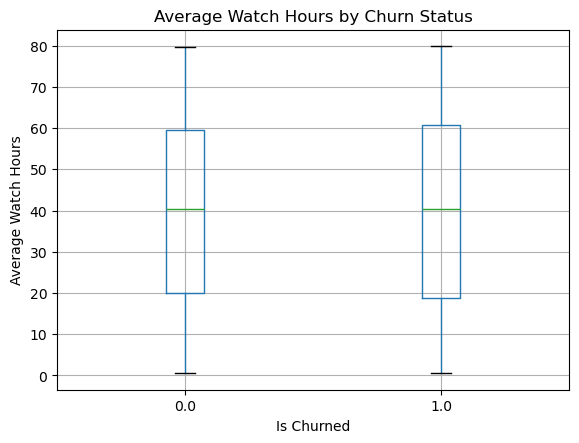

In [564]:
# Boxplot – Watch time vs churn.
data.boxplot(column='average_watch_hours', by='is_churned')
plt.title('Average Watch Hours by Churn Status')
plt.suptitle('')
plt.xlabel('Is Churned')
plt.ylabel('Average Watch Hours')
plt.show()

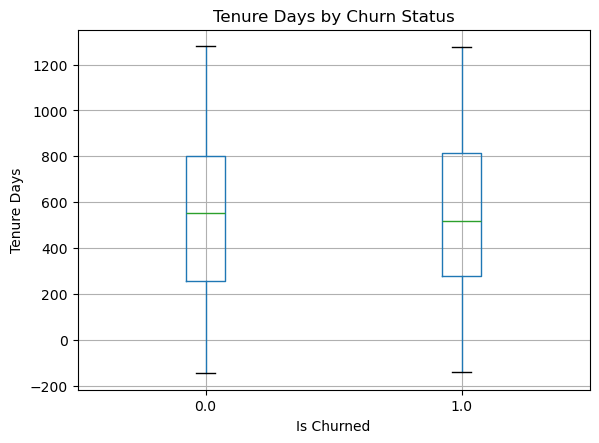

In [565]:
# Boxplot – Tenure vs churn.
data.boxplot(column='tenure_days', by='is_churned')
plt.title('Tenure Days by Churn Status')
plt.suptitle('')
plt.xlabel('Is Churned')
plt.ylabel('Tenure Days')
plt.show()

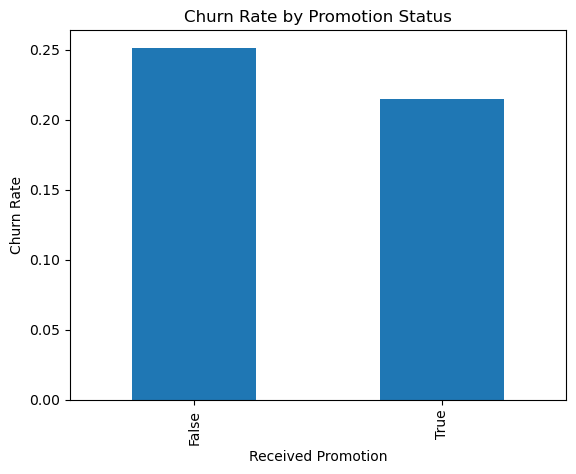

In [566]:
# Bar plot – Churn rate by promotion status.
promotion_churn = data.groupby('received_promotions_Yes')['is_churned'].mean()

promotion_churn.plot(kind='bar')
plt.title('Churn Rate by Promotion Status')
plt.xlabel('Received Promotion')
plt.ylabel('Churn Rate')
plt.show()

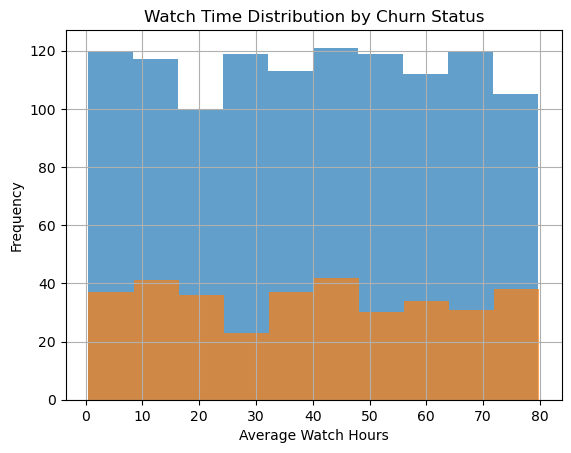

In [567]:
# Histogram – Watch time distribution.
data.loc[data['is_churned'] == 0, 'average_watch_hours'].hist(alpha=0.7)
data.loc[data['is_churned'] == 1, 'average_watch_hours'].hist(alpha=0.7)
plt.title('Watch Time Distribution by Churn Status')
plt.xlabel('Average Watch Hours')
plt.ylabel('Frequency')
plt.show()

##  Predictive Modelling

### Logistic Regression

In [570]:
# Preparing features and target.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    f1_score, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
import pandas as pd

# Target
y = data['is_churned']

# Features (drop target and identifiers)
X = data.drop(columns=['is_churned', 'user_id', 'signup_date', 'last_active_date'])

In [571]:
# Train–test split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [572]:
# Feature scaling.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [573]:
# Fitting Logistic Regression.
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [574]:
# Predictions.
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [575]:
# Model Evaluation.
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Metrics
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
 [[229   0]
 [ 70   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


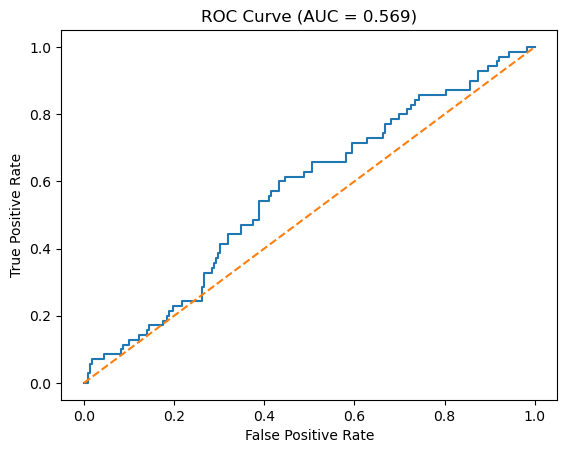

In [576]:
# ROC curve and AUC.
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title(f'ROC Curve (AUC = {auc_score:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [577]:
# Interpreting coefficients (important churn predictors)
coefficients = pd.Series(
    log_reg.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

print('Most important predictors of churn:')
print(coefficients)

Most important predictors of churn:
received_promotions_Unknown    0.314869
country_Unknown               -0.228752
gender_Unknown                 0.183547
monthly_fee                   -0.168803
is_loyal                       0.147858
subscription_type_Premium      0.143030
gender_Other                  -0.141345
gender_Male                   -0.135199
subscription_type_Unknown     -0.133562
country_UK                     0.116824
received_promotions_Yes       -0.101901
subscription_type_Standard     0.096135
country_India                  0.076009
tenure_days                   -0.061058
country_France                 0.042145
country_USA                    0.038551
referred_by_friend_Yes        -0.034678
mobile_app_usage_pct           0.033961
average_watch_hours           -0.022352
country_Germany                0.019772
complaints_raised             -0.009242
age                           -0.007169
dtype: float64


### Linear Regression

In [579]:
# Prepare features and target.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_lr = data['average_watch_hours']
X_lr = data.drop(columns=['average_watch_hours', 'user_id', 'signup_date', 'last_active_date'])

In [580]:
# Train-test split.
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42
)

In [581]:
# Scaling features.
scaler_lr = StandardScaler()

X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)

In [582]:
# Fitting Linear Regression.
lin_reg = LinearRegression()
lin_reg.fit(X_train_lr_scaled, y_train_lr)

LinearRegression()

In [583]:
# Predictions & evaluation.
y_pred_lr = lin_reg.predict(X_test_lr_scaled)

r2 = r2_score(y_test_lr, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

print('R²:', r2)
print('RMSE:', rmse)

R²: -0.024787001449100732
RMSE: 22.024530764615573


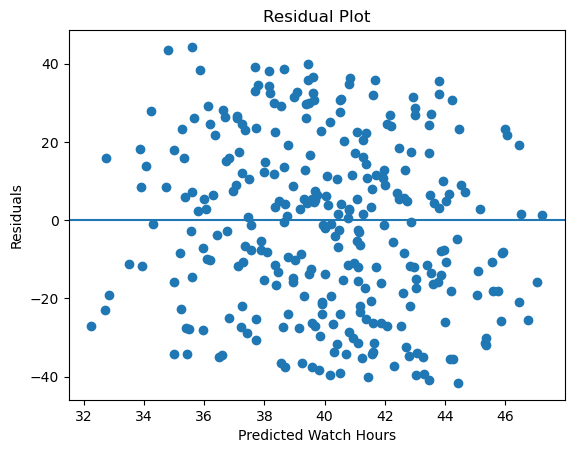

In [584]:
# Residual plot.
residuals = y_test_lr - y_pred_lr

plt.scatter(y_pred_lr, residuals)
plt.axhline(0)
plt.xlabel('Predicted Watch Hours')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [585]:
# Interpret coefficients (business insights).
lin_coefficients = pd.Series(
    lin_reg.coef_,
    index=X_lr.columns
).sort_values(key=abs, ascending=False)

print('Feature impact on average_watch_hours:')
print(lin_coefficients)

Feature impact on average_watch_hours:
subscription_type_Premium     -2.301754
tenure_days                   -2.196272
monthly_fee                    1.966138
gender_Male                   -1.624869
country_India                  1.623465
is_loyal                       1.572712
age                            1.294095
subscription_type_Standard    -1.101382
complaints_raised             -0.772003
country_UK                     0.712087
country_USA                    0.696939
gender_Other                  -0.460694
subscription_type_Unknown      0.395579
is_churned                    -0.359250
received_promotions_Unknown    0.313917
received_promotions_Yes        0.293327
country_Unknown                0.255072
mobile_app_usage_pct          -0.245607
gender_Unknown                -0.233722
country_Germany                0.219480
referred_by_friend_Yes         0.181343
country_France                -0.163300
dtype: float64


## Business Questions to Answer

In [587]:
# 1. Do users who receive promotions churn less?
# Import libraries.
from scipy.stats import chi2_contingency

# Creating a contingency table: rows = received promotion, columns = is_churned.
contingency_table = pd.crosstab(original_data['received_promotions'], original_data['is_churned'])
print("\nContingency Table:\n", contingency_table)

# Calculating churn rate for each group.
churn_rate = contingency_table[1] / (contingency_table[0] + contingency_table[1])
print("\nChurn Rate by Promotion:\n", churn_rate)

# Performing chi-square test for independence.
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p}")

# Interpreting result.
if p < 0.05:
    print("There is a statistically significant difference in churn rates between users who received promotions and those who did not.")
else:
    print("No statistically significant difference in churn rates was found between users who received promotions and those who did not.")


Contingency Table:
 is_churned           0.0  1.0
received_promotions          
No                   572  189
Unknown                0    3
Yes                  574  157

Churn Rate by Promotion:
 received_promotions
No         0.248357
Unknown    1.000000
Yes        0.214774
dtype: float64

Chi-square test p-value: 0.0022197690668103363
There is a statistically significant difference in churn rates between users who received promotions and those who did not.


In [588]:
# 2. Does watch time impact churn likelihood?
# Grouping by churn status and calculate mean watch hours.
mean_watch = df.groupby('is_churned')['average_watch_hours'].mean()
print("\nAverage Watch Hours by Churn Status:\n", mean_watch)


Average Watch Hours by Churn Status:
 is_churned
0.0    39.955983
1.0    39.702000
Name: average_watch_hours, dtype: float64


In [589]:
# 3. Are mobile dominant users more likely to cancel?
# Step 1: Compare mean mobile usage between churned and non-churned users
mean_mobile_usage = original_data.groupby('is_churned')['mobile_app_usage_pct'].mean()
print("\nAverage Mobile Usage % by Churn Status:\n", mean_mobile_usage)

# Step 2: Perform t-test to check significance
from scipy.stats import ttest_ind

churned_mobile = original_data[original_data['is_churned'] == 1]['mobile_app_usage_pct']
not_churned_mobile = original_data[original_data['is_churned'] == 0]['mobile_app_usage_pct']

t_stat, p_value = ttest_ind(churned_mobile, not_churned_mobile)
print(f"\nT-test p-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in mobile usage between churned and non-churned users.")
else:
    print("No statistically significant difference in mobile usage between churned and non-churned users.")

# Step 3: Optional - Logistic regression to quantify impact
import statsmodels.api as sm

X = original_data[['mobile_app_usage_pct']]
X = sm.add_constant(X)  # add intercept
y = original_data['is_churned']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Average Mobile Usage % by Churn Status:
 is_churned
0.0    51.154276
1.0    52.380181
Name: mobile_app_usage_pct, dtype: float64

T-test p-value: 0.48308432979657956
No statistically significant difference in mobile usage between churned and non-churned users.
Optimization terminated successfully.
         Current function value: 0.543240
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             is_churned   No. Observations:                 1495
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Jan 2026   Pseudo R-squ.:               0.0003035
Time:                        23:07:26   Log-Likelihood:                -812.14
converged:                       True   LL-Null:                       -812.39
Covariance Type:            nonrobust   LLR p-value:                    0.4826
    

In [634]:
# 4. What are the top 3 features influencing churn based on your model?
# Assuming your logistic regression model is called logit_model
# and you used all features in X

# Get coefficients as a DataFrame
coeff_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': logit_model.params
})

# Take absolute values to see strongest influence
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()

# Sort by absolute impact and show top 3
top_features = coeff_df.sort_values(by='abs_coefficient', ascending=False).head(3)
print("\nTop 3 features influencing churn:\n", top_features[['feature', 'coefficient']])


Top 3 features influencing churn:
                                    feature  coefficient
const                                const    -1.266826
mobile_app_usage_pct  mobile_app_usage_pct     0.001504


In [636]:
# 5. Which customer segments should the retention team prioritise?
# Example segmentation based on high-risk features
high_risk = original_data[
    (original_data['average_watch_hours'] < original_data['average_watch_hours'].median()) &
    (original_data['received_promotions'] == 0) &
    (original_data['mobile_app_usage_pct'] > original_data['mobile_app_usage_pct'].median())
]

print("Number of high-risk users:", len(high_risk))

Number of high-risk users: 0
